In [1]:
import keras
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.regularizers import L1,L1L2,L2
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(r"C:\Users\91998\Downloads\1.ushape.csv",header=None)


In [3]:
data.head()

,0,1,2
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [5]:
data[2].unique()

array([0., 1.])

### Observation:  we can say that our task is binary classification task as our target variable have 2 classes.

In [6]:
x=data.iloc[:,0:2]
y=data.iloc[:,2].astype(int)

In [7]:
import seaborn as sns

<Axes: xlabel='0', ylabel='1'>

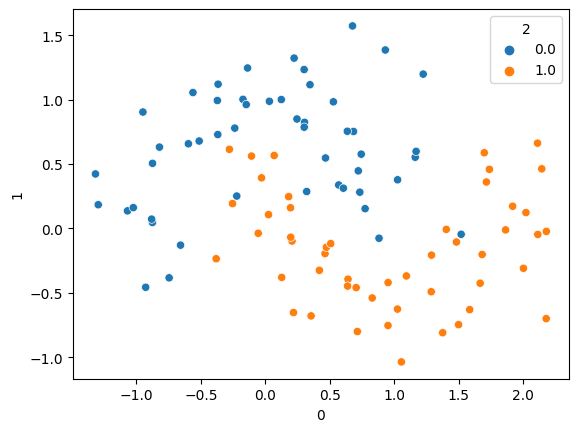

In [8]:
sns.scatterplot(data=data,x=0,y=1,hue=2)

### Observation: By viewing the above graph we can easily say that x and y s have non linear relationship.

In [9]:
## Splitting the data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [10]:
## Preprocessing train and test data
std=StandardScaler()
x_trainp=std.fit_transform(x_train)
x_testp=std.transform(x_test)

In [77]:
## building Logical Structure
model=Sequential()
model.add(Dense(22,activation="tanh",kernel_regularizer=L2(0.01),bias_regularizer=L2(0.01),input_dim=2))
model.add(Dense(18,activation="tanh",kernel_regularizer=L2(0.01),bias_regularizer=L2(0.01)))
model.add(Dense(10,activation="tanh",kernel_regularizer=L2(0.01),bias_regularizer=L2(0.01)))
model.add(Dense(4,activation="tanh",kernel_regularizer=L2(0.01),bias_regularizer=L2(0.01)))
model.add(Dense(1,activation="sigmoid",kernel_regularizer=L2(0.01),bias_regularizer=L2(0.01)))

In [95]:
model=Sequential()
model.add(Dense(18,activation="tanh",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001),input_dim=2))
model.add(Dense(16,activation="tanh",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(10,activation="tanh",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(8,activation="tanh",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(1,activation="sigmoid",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))

In [96]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 18)                54        
                                                                 
 dense_71 (Dense)            (None, 16)                304       
                                                                 
 dense_72 (Dense)            (None, 10)                170       
                                                                 
 dense_73 (Dense)            (None, 8)                 88        
                                                                 
 dense_74 (Dense)            (None, 1)                 9         
                                                                 
Total params: 625 (2.44 KB)
Trainable params: 625 (2.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [97]:
## Training the model
model.compile(loss="binary_crossentropy",optimizer=SGD(learning_rate=0.1),metrics=["accuracy"])
history=model.fit(x_trainp,y_train,batch_size=5,epochs=20,validation_split=0.1)

Epoch 1/20
17/17 [==============================] - 1s 17ms/step - loss: 0.6484 - accuracy: 0.6790 - val_loss: 0.5350 - val_accuracy: 0.8889
Epoch 2/20
17/17 [==============================] - 0s 4ms/step - loss: 0.4575 - accuracy: 0.8642 - val_loss: 0.4623 - val_accuracy: 0.8889
Epoch 3/20
17/17 [==============================] - 0s 4ms/step - loss: 0.4361 - accuracy: 0.8642 - val_loss: 0.4676 - val_accuracy: 0.8889
Epoch 4/20
17/17 [==============================] - 0s 4ms/step - loss: 0.4283 - accuracy: 0.8519 - val_loss: 0.4629 - val_accuracy: 0.8889
Epoch 5/20
17/17 [==============================] - 0s 4ms/step - loss: 0.4125 - accuracy: 0.8765 - val_loss: 0.4662 - val_accuracy: 0.7778
Epoch 6/20
17/17 [==============================] - 0s 4ms/step - loss: 0.4056 - accuracy: 0.8519 - val_loss: 0.4478 - val_accuracy: 0.8889
Epoch 7/20
17/17 [==============================] - 0s 4ms/step - loss: 0.4204 - accuracy: 0.8272 - val_loss: 0.4708 - val_accuracy: 0.8889
Epoch 8/20
17/17 [=

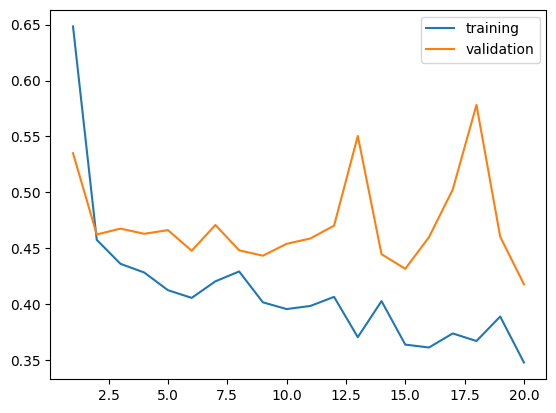

In [98]:
plt.plot(range(1,21),history.history["loss"],label="training")
plt.plot(range(1,21),history.history["val_loss"],label="validation")
plt.legend()

In [99]:
from mlxtend.plotting import plot_decision_regions

9600/9600 [==============================] - 9s 879us/step


<Axes: >

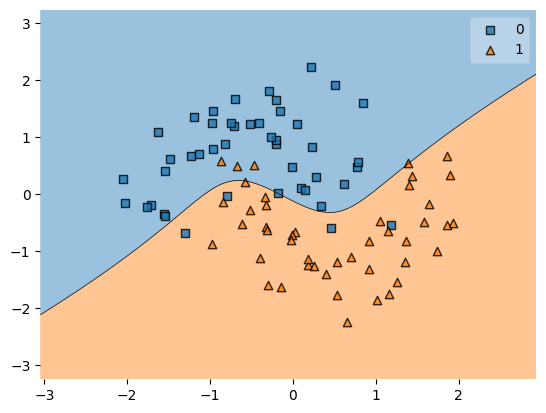

In [100]:
plot_decision_regions(x_trainp,y_train.values,clf=model)

### Observation: Even though we are used L2(ridge) regularization and tanh activation function we didn't get best fit. 

In [185]:
model=Sequential()
model.add(Dense(24,activation="relu",input_dim=2))
model.add(Dense(22,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [186]:
model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_141 (Dense)           (None, 24)                72        
                                                                 
 dense_142 (Dense)           (None, 22)                550       
                                                                 
 dense_143 (Dense)           (None, 20)                460       
                                                                 
 dense_144 (Dense)           (None, 1)                 21        
                                                                 
Total params: 1103 (4.31 KB)
Trainable params: 1103 (4.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [187]:
## Training the model
model.compile(loss="binary_crossentropy",optimizer=SGD(learning_rate=0.1),metrics=["accuracy"])
history=model.fit(x_trainp,y_train,batch_size=5,epochs=20,validation_split=0.1)

Epoch 1/20
17/17 [==============================] - 1s 12ms/step - loss: 0.6923 - accuracy: 0.6173 - val_loss: 0.6562 - val_accuracy: 0.7778
Epoch 2/20
17/17 [==============================] - 0s 4ms/step - loss: 0.6121 - accuracy: 0.8395 - val_loss: 0.5652 - val_accuracy: 0.7778
Epoch 3/20
17/17 [==============================] - 0s 4ms/step - loss: 0.4995 - accuracy: 0.8519 - val_loss: 0.4668 - val_accuracy: 0.8889
Epoch 4/20
17/17 [==============================] - 0s 4ms/step - loss: 0.4018 - accuracy: 0.8642 - val_loss: 0.4088 - val_accuracy: 0.8889
Epoch 5/20
17/17 [==============================] - 0s 3ms/step - loss: 0.3580 - accuracy: 0.8272 - val_loss: 0.3988 - val_accuracy: 0.8889
Epoch 6/20
17/17 [==============================] - 0s 3ms/step - loss: 0.3420 - accuracy: 0.8642 - val_loss: 0.4158 - val_accuracy: 0.8889
Epoch 7/20
17/17 [==============================] - 0s 3ms/step - loss: 0.3411 - accuracy: 0.8642 - val_loss: 0.3853 - val_accuracy: 0.6667
Epoch 8/20
17/17 [=

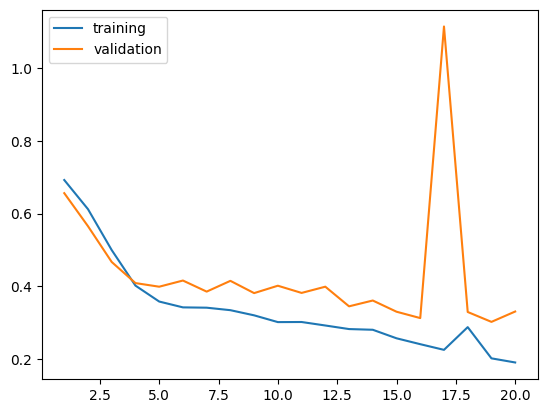

In [188]:
plt.plot(range(1,21),history.history["loss"],label="training")
plt.plot(range(1,21),history.history["val_loss"],label="validation")
plt.legend()

9600/9600 [==============================] - 8s 872us/step


<Axes: >

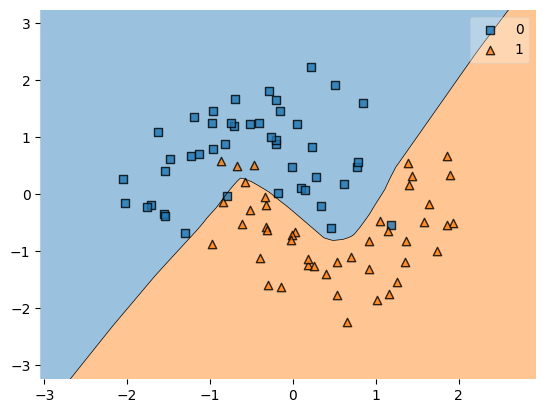

In [189]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_trainp,y_train.values,clf=model)

In [ ]:
### Observation: Using relu without regularization also we are getting best fit

9600/9600 [==============================] - 8s 859us/step


<Axes: >

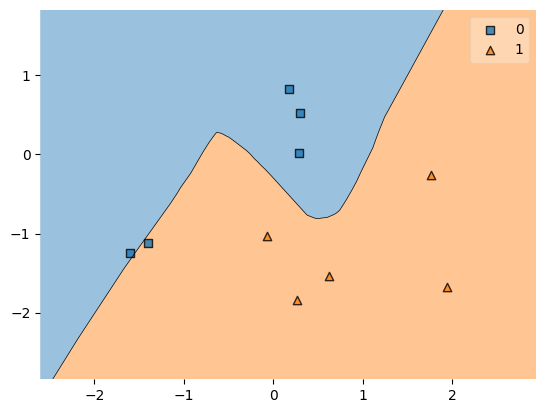

In [190]:
plot_decision_regions(x_testp,y_test.values,clf=model)